In [51]:
import numpy as np

All hierarchical algorithms described here work on the distance matrix, lets recover the function to calculate it:

In [1]:
def distance_matrix(X):
    """Returns the distance matrix from a data matrix X. """
    
    D = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1))
    
    return D

# Hierarchical Clustering

Hierarchical clustering algorithms they hierarchical representations in which
the clusters at each level of the hierarchy are created by merging clusters
at the next lower level. At the lowest level, each cluster contains a single
observation. At the highest level there is only one cluster containing all of
the data. 

Two basic paradigms:
1. Agglomerative (bottom-up): Start at the bottom and at each level recursively merge a selected pair of clusters into a single cluster. This produces a grouping at the next higher level with one less cluster. The pair chosen for merging consist of the two groups with the smallest intergroup dissimilarity.

2. Divisive (top-down): Divisive methods start at the top and at each level recursively split one of the existing clusters at that level into two new clusters. The split is chosen to produce two new groups with the largest between-group dissimilarity. 

With both paradigms there are $N - 1$ levels in the hierarchy. Each level represents a different partition. The entire hierarchy represents an ordered sequence of such groupings. The choice of a particular partition depends on the characteristics of each particular dataset, and often requires domain knowledge, though some metrics, such as the gap statistic can aid the decision. 

## Agglomerative clustering: Linkage Schemes


While we can use the distance_matrix function, for our first example we will provide a pre-computed distance 

In [50]:
D = np.array([
    [ 0, 17, 21, 31, 23],
    [17,  0, 30, 34, 21],
    [21, 30,  0, 28, 39],
    [31, 34, 28,  0, 43],
    [23, 21, 39, 43,  0]
])

### Single Linkage

In [ ]:
def single_linkage(D, r, s):
    """ Finds new cluster distances according to the single
    linkage criterion.
    INPUTS:
        - D: distance matrix
        - r: index of first
        - s: index of second
    OUTPUTS:
        - """

### Agglomerative clustering: Single Linkage

In single-linkage clustering, the distance between two clusters is determined by a single element pair, namely those two elements (one in each cluster) that are closest to each other. The shortest of these links that remains at any step causes the fusion of the two clusters whose elements are involved. The method is also known as nearest neighbor clustering.  A drawback of this method is that it tends to produce long thin clusters in which nearby elements of the same cluster have small distances, but elements at opposite ends of a cluster may be much farther from each other than two elements of other clusters. This may lead to difficulties in defining classes that could usefully subdivide the data.

Mathematically, the linkage function – the distance D(X,Y) between clusters X and Y – is described by the expression
$$
D(X,Y)=\min _{x\in X,y\in Y}d(x,y),
$$
where $X$ and $Y$ are any two sets of elements considered as clusters, and $d(x,y)$ denotes the distance between the two elements $x$ and $y$.

The following algorithm is an agglomerative scheme that erases rows and columns in a proximity matrix as old clusters are merged into new ones. The $N\times N$ proximity matrix $D$ contains all distances $d(i,j)$. The clusterings are assigned sequence numbers $0,1,\ldots,n-1$ and $L(k)$ is the level of the $k$-th clustering. A cluster with sequence number $m$ is denoted $(m)$ and the proximity between clusters $(r)$ and $(s)$ is denoted $d[(r),(s)]$.

The single linkage algorithm is composed of the following steps:
1. Begin with the disjoint clustering having level $L(0)=0$ and sequence number $m=0$.
2. Find the most similar pair of clusters in the current clustering, say pair $(r),(s)$, according to $d[(r),(s)]=\min d[(i),(j)]$ where the minimum is over all pairs of clusters in the current clustering.
3. Increment the sequence number: $m=m+1$. Merge clusters $(r)$ and $(s)$ into a single cluster to form the next clustering $m$. Set the level of this clustering to $L(m)=d[(r),(s)]$.
4. Update the proximity matrix, $D$, by deleting the rows and columns corresponding to clusters $(r)$ and $(s)$ and adding a row and column corresponding to the newly formed cluster. The proximity between the new cluster, denoted $(r,s)$ and old cluster $(k)$ is defined as $d[(r,s),(k)]=\min\{d[(k),(r)],d[(k),(s)]\}$.
5. If all objects are in one cluster, stop. Else, go to step 2.

We now need a function to find the minimum distance in a distance matrix:

In [49]:
def find_merge(D):
    """ Find clusters to merge.
    
    INPUTS:
        - D: square distance matrix.
    OUTPUTS:
        - d_min: minimum distance in D.
        - i: row index of d_min
        - j: column index of d_min
    """

    
    d = D.shape[0]
    
    # You must return the following values correctly
    d_min = 0
    i = -1
    j = -1
    
    # Find minimum of the distance matrix excluding the diagonal
    ### BEGIN SOLUTION
    mask = np.ones(D.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    valid_idx = np.where(mask)[0]
    d_min = D[mask].min()
    i, j = np.where(D == d_min)[0]
    ### END SOLUTION
        
    return d_min, i, j

Now, test it on the example Data Matrix D, you should obtain 17:

In [47]:
d, i, j = dist_sl(D)
print(f'Minimum distance in D: {d}, at position ({i},{j})')
### BEGIN HIDDEN TESTS
assert dist_sl(D) == (17, 0, 1)
### END HIDDEN TESTS

Minimum distance in D: 17, at position (0,1)


Now we need a way to delete the corresponding row/columns in D, and add a new pair of row-column for the new cluster formed my merging. Adding and deleting rows/columns from numpy arrays is SLOW, so a better approach is to use masks on the original data matrix. If you are not familiar with masks, you may take the slow approach of modifying the D matrix at each iteration.

In [55]:
def merge_clusters(D, i, j):
    """ Merge clusters (i) (j) with distances given in D. 
    INPUTS:
        - D: distance matrix for clusters.
        - i: index of the first cluster to merge.
        - j: index of the second cluster to merge.
        
    OUPUT
        - D_new: new data matrix with """
    
    mask = mask = np.ones(D.shape, dtype=bool)
    # Remove row i and column j
    mask[i,:] = False
    mask[:,j] = False
    
    # Replace contents in row j and column i with
    # the distances to the new cluster.
    

In [56]:
mask = mask = np.ones(D.shape, dtype=bool)
mask[i,:] = False
mask[:,j] = False

In [57]:
D[mask].reshape()

array([17, 30, 34, 21, 21,  0, 28, 39, 31, 28,  0, 43, 23, 39, 43,  0])

### Agglomerative clustering: Complete Linkage

### Agglomerative clustering: Average Linkage

### Agglomerative clustering: Wards criterion

## Dendrogram

Recursive binary splitting/agglomeration can be represented by a rooted
binary tree. The nodes of the trees represent groups. The root node represents the entire data set. The N terminal nodes each represent one of the
individual observations (singleton clusters). Each nonterminal node ("parent") has two daughter nodes. For divisive clustering the two daughters
represent the two groups resulting from the split of the parent; for agglomerative clustering the daughters represent the two groups that were merged
to form the parent.

Most agglomerative and some divisive methods (when viewed bottom-up) possess a monotonicity property. That is, the dissimilarity between
merged clusters is monotone increasing with the level of the merger. Thus
the binary tree can be plotted so that the height of each node is proportional
to the value of the intergroup dissimilarity between its two daughters. The
terminal nodes representing individual observations are all plotted at zero
height. This type of graphical display is called a dendrogram.


## References
- Elements of Statistical Learning Section 14.3.12
- https://en.wikipedia.org/wiki/Single-linkage_clustering

## Example: Human Tumor Microarray Data

In [7]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [33]:
f = open('nci.micro.data.pkl', 'rb')
data_dic = pkl.load(f)
f.close()

X = data_dic['data'].T
y = data_dic['labels']

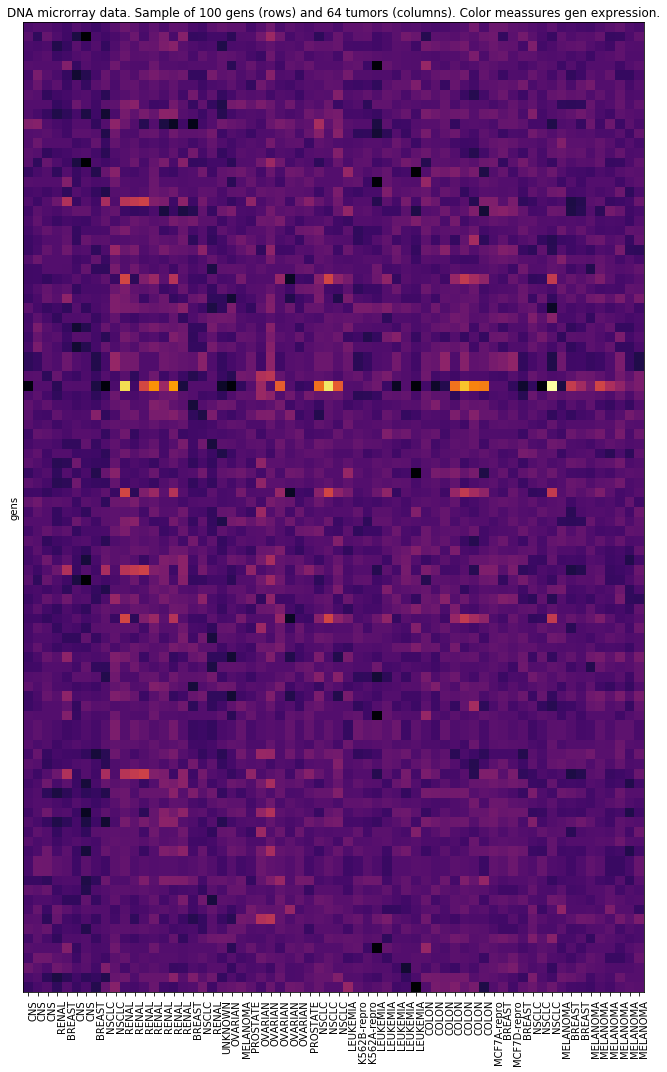

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(X.T[np.random.randint(len(X), size=100),:], cmap='inferno')

labels = data_dic['labels']
gens = [f'gen{x:03}' for x in range(100)]

# We want to show all ticks
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks([])
ax.set_xticklabels(labels)
ax.set_ylabel('gens')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

ax.set_title("DNA microrray data. Sample of 100 gens (rows) and 64 tumors (columns). Color meassures gen expression.")
fig.tight_layout()
plt.show()

### K-means for comparison

In [24]:
from sklearn.cluster import KMeans

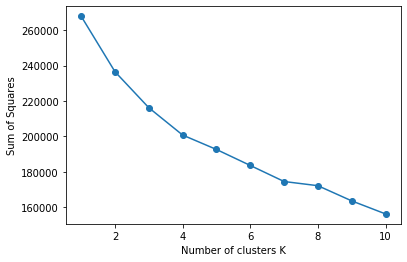

In [35]:
# How many clusters?
sum_sq = []
for K in range(1,11):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    sum_sq.append(kmeans.inertia_)
plt.plot(range(1,11), sum_sq, '-o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squares');

In [65]:
# No clear elbow, choose K=3.
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
C = kmeans.labels_

In [69]:
# Build table with label count
import pandas as pd

y = np.array(y)
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
df

,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
0,2,0,7,1,1,6,1,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,7,0,0,0,0,0
2,3,5,0,0,0,0,0,0,1,9,6,2,9,1


We see that the procedure is successful at grouping together samples of the same cancer. In fact, the two breast cancers in the second cluster were later found to be misdiagnosed and were melanomas that had metastasized. However, K-means clustering has shortcomings in this application. For one, it does not give a linear ordering of objects within a cluster. Secondly, as the number of clusters K is changed, the cluster membership can change in arbitrary ways. That is, with say four clusters, the clusters need not to be nested with the three clusters above. For these reason, hierarchical clustering is probably preferable for this application.